# Exercise 17

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
tweets = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Tweets.zip', index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [3]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [4]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

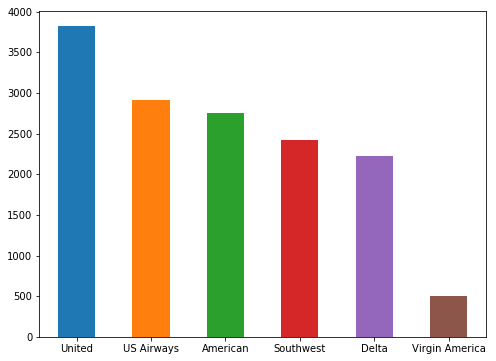

In [5]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

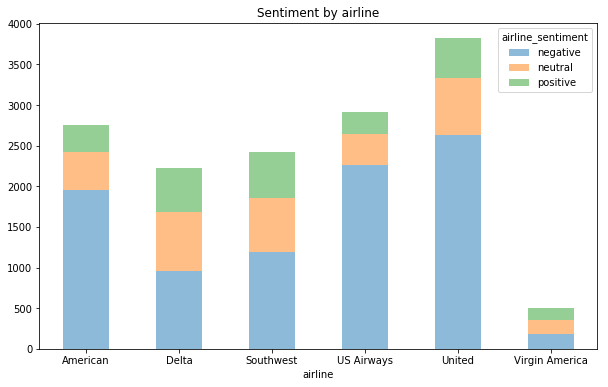

In [6]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 17.1 

Predict the sentiment using CountVectorizer

use Random Forest classifier

Aplicar cualquier proceso solo al TRAIN

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn import metrics

In [8]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

Aplicar countvectorizer a X, realizar predicción y usar cross validation

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
vect = CountVectorizer()
X_train_vec = vect.fit_transform(X_train)

In [11]:
vect.vocabulary_

{'jetblue': 6368,
 're': 9010,
 'flight': 4861,
 '8088': 1207,
 'sxm': 10614,
 'gt': 5466,
 'jfk': 6393,
 'what': 11950,
 'time': 10935,
 'does': 4070,
 'bus': 2686,
 'leave': 6733,
 'hotel': 5822,
 'on': 8021,
 'feb': 4725,
 '22': 430,
 'mass': 7178,
 'confusion': 3350,
 'here': 5676,
 'americanair': 1754,
 'why': 11998,
 'are': 1941,
 'you': 12261,
 'still': 10369,
 'selling': 9776,
 'tickets': 10917,
 'when': 11964,
 'haven': 5600,
 'rebooked': 9053,
 'people': 8367,
 'to': 10983,
 'arrive': 1970,
 'at': 2028,
 'their': 10821,
 'destinations': 3855,
 'usairways': 11593,
 'have': 5599,
 'now': 7890,
 'called': 2771,
 '12': 124,
 'times': 10940,
 'in': 6011,
 'the': 10809,
 'last': 6677,
 'three': 10886,
 'days': 3698,
 'that': 10805,
 'unacceptable': 11384,
 'willing': 12020,
 'wait': 11812,
 'hold': 5745,
 'but': 2697,
 'not': 7857,
 'an': 1780,
 'option': 8076,
 'virginamerica': 11741,
 'sounds': 10189,
 'like': 6814,
 'fun': 5147,
 'statement': 10332,
 'lufthansa': 7017,
 'incenti

In [12]:
X_test_vec=vect.transform(X_test)

In [13]:
#Random Forest
rf=RandomForestClassifier(n_estimators=10)
rf.fit(X_train_vec, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
y_pred=rf.predict(X_test_vec)

In [15]:
y_acc = metrics.accuracy_score(y_pred, y_test)
print (' accuracy: ', y_acc)

 accuracy:  0.7472677595628415


In [16]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
cross_val_score(nb,X_train_vec, y_train, cv=10)

array([0.77290448, 0.74366472, 0.77095517, 0.7417154 , 0.76195122,
       0.76074219, 0.75976562, 0.76757812, 0.75097656, 0.7487781 ])

Para validar el modelo, se intentó usar métricas como el f1score y fbeta, pero arrojaba un error relacionado con variables binomiales.

# Exercise 17.2 

Remove stopwords, then predict the sentiment using CountVectorizer.

use Random Forest classifier

In [17]:
vect2 = CountVectorizer(stop_words='english')
print(vect2.get_stop_words())

frozenset({'indeed', 'on', 'always', 'yours', 'more', 'during', 'no', 'within', 'almost', 'due', 'show', 'ever', 'put', 'made', 'fifteen', 'each', 'name', 'although', 'side', 'sincere', 'something', 'we', 'get', 'least', 'were', 'me', 'go', 'already', 'whole', 'seems', 'being', 'namely', 'this', 'part', 'against', 'themselves', 'became', 'hereupon', 'whenever', 'everywhere', 'who', 'their', 'beyond', 'etc', 'how', 'seem', 'up', 'please', 'whose', 'de', 'yourself', 'can', 'when', 'those', 'system', 'of', 'been', 'had', 'four', 'amount', 'nothing', 'meanwhile', 'ten', 'neither', 'my', 'keep', 'becomes', 'among', 'except', 'why', 'own', 'only', 'that', 'before', 'done', 'along', 'next', 'yourselves', 'five', 'many', 'thick', 'may', 'must', 'around', 'thereafter', 'few', 'myself', 'serious', 'though', 'ourselves', 'thereby', 'someone', 'several', 'anyone', 'however', 'eleven', 'last', 'where', 'anyway', 'some', 'noone', 'fire', 'anything', 'beside', 'hundred', 'none', 'the', 'mill', 'sixty

In [18]:
X_train_vec2 = vect2.fit_transform(X_train)

In [19]:
X_test_vec2=vect2.transform(X_test)

In [20]:
#Random Forest
rf2=RandomForestClassifier(n_estimators=10)
rf2.fit(X_train_vec2, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
y_pred2=rf2.predict(X_test_vec2)

In [22]:
y_acc2 = metrics.accuracy_score(y_pred2, y_test)
print (' accuracy: ', y_acc2)

 accuracy:  0.7449908925318761


In [23]:
cross_val_score(nb,X_train_vec2, y_train, cv=10)

array([0.76023392, 0.7417154 , 0.76023392, 0.72807018, 0.76097561,
       0.74609375, 0.73925781, 0.75878906, 0.73925781, 0.75659824])

# Exercise 17.3

Increase n_grams size (with and without stopwords),  then predict the sentiment using CountVectorizer

use Random Forest classifier

Usar ngramas de 1 a 2

ngrama solo en el train

In [24]:
#Sin stop Words
vect3_1 = CountVectorizer(ngram_range=(1, 4))

In [25]:
X_train_vec3_1 = vect3_1.fit_transform(X_train)
X_test_vec3_1=vect3_1.transform(X_test)
print(vect3_1.get_feature_names()[100:150])

['00pm amp it', '00pm amp it is', '00pm on', '00pm on sunday', '00pm on sunday night', '00pm today', '00pm today didn', '00pm today didn get', '0162389030167', '0162389030167 refund', '0162389030167 refund request', '0162389030167 refund request 16866853', '0162424965446', '0162424965446 please', '0162424965446 please refund', '0162424965446 please refund my', '0162431184663', '0162431184663 of', '0162431184663 of your', '0162431184663 of your agents', '0185', '01ldxn3qqq', '01pm', '01pm and', '01pm and still', '01pm and still don', '02', '02 14', '02 14 when', '02 14 when this', '02 20', '02 20 15', '02 23', '02 23 got', '02 23 got cncled', '02 this', '02 this is', '02 this is ridiculous', '0200', '03', '03 am', '0372389047497', '0372389047497 totally', '0372389047497 totally unacceptable', '0372389047497 totally unacceptable fix', '04', '04 dpt', '04 dpt for', '04 dpt for 40', '0400']


In [26]:
#Random Forest
rf3_1=RandomForestClassifier(n_estimators=10)
rf3_1.fit(X_train_vec3_1, y_train)
y_pred3_1=rf3_1.predict(X_test_vec3_1)
y_acc3_1 = metrics.accuracy_score(y_pred3_1, y_test)
print (' accuracy: ', y_acc3_1)

 accuracy:  0.7411202185792349


In [27]:
#Con stop Words
vect3_2 = CountVectorizer(stop_words='english',ngram_range=(1, 4))

In [28]:
X_train_vec3_2 = vect3_2.fit_transform(X_train)
X_test_vec3_2=vect3_2.transform(X_test)

In [29]:
#Random Forest
rf3_2=RandomForestClassifier(n_estimators=10)
rf3_2.fit(X_train_vec3_2, y_train)
y_pred3_2=rf3_2.predict(X_test_vec3_2)
y_acc3_2 = metrics.accuracy_score(y_pred3_2, y_test)
print (' accuracy: ', y_acc3_2)

 accuracy:  0.7215391621129326


# Exercise 17.4

Predict the sentiment using TfidfVectorizer.

use Random Forest classifier

In [30]:
vect4 = TfidfVectorizer()

In [31]:
X_train_vec4 = vect4.fit_transform(X_train)
X_test_vec4=vect4.transform(X_test)

In [32]:
features = vect.get_feature_names()
print(features)

['00', '000', '000114', '000ft', '0011', '0016', '00a', '00am', '00p', '00pm', '0162389030167', '0162424965446', '0162431184663', '0185', '01ldxn3qqq', '01pm', '02', '0200', '03', '0372389047497', '04', '0400', '04sdytt7zd', '05', '0510', '0530', '05am', '05pm', '06', '0600', '0638', '0736', '0769', '07p', '07xhcacjax', '08', '0_0', '0bjnz4eix5', '0hmmqczkcf', '0jjt4x3yxg', '0jutcdrljl', '0kn7pjelzl', '0liwecasoe', '0pdntgbxc6', '0prgysvurm', '0wbjawx7xd', '0xjared', '10', '100', '1000', '1000cost', '1001', '1002', '1007', '1008', '101', '1019', '1020', '1024', '1027', '103', '1038', '104', '1041', '1046', '105', '1050', '1051', '1058', '106', '1065', '1071', '108', '1080', '1081', '1086', '1098', '1099', '10a', '10am', '10f', '10hrs', '10m', '10min', '10mins', '10p', '10pm', '10th', '10tmthvfdc', '10x', '10x9x17', '10yr', '11', '110', '1101', '1106', '1108', '1109', '1117', '1119', '1120am', '1125', '1130', '1130pm', '1136', '1137', '1140', '1142', '1146', '1152', '1153', '1159', '117

In [33]:
rf4=RandomForestClassifier(n_estimators=10)
rf4.fit(X_train_vec4, y_train)
y_pred4=rf4.predict(X_test_vec4)
y_acc4 = metrics.accuracy_score(y_pred4, y_test)
print (' accuracy: ', y_acc4)

 accuracy:  0.7418032786885246


Como conclusión general se establece que no hay una variación relevante entre los métodos que incluyen o no los stopwords. Es posible que dentro de los modelos en los que se están excluyendo los stopwords queden aún algun tipo de palabras que no aporten nada al modelo o que por el contrario se estén retirando palabras que sì aportan al modelo por lo que las variaciones en los niveles del accuracy son de aproximadamente 0.02.